<a href="https://colab.research.google.com/github/Soot3/Submissions/blob/master/amazon_bestsellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Decade of Bestselling Books: Exploring Amazon Sales

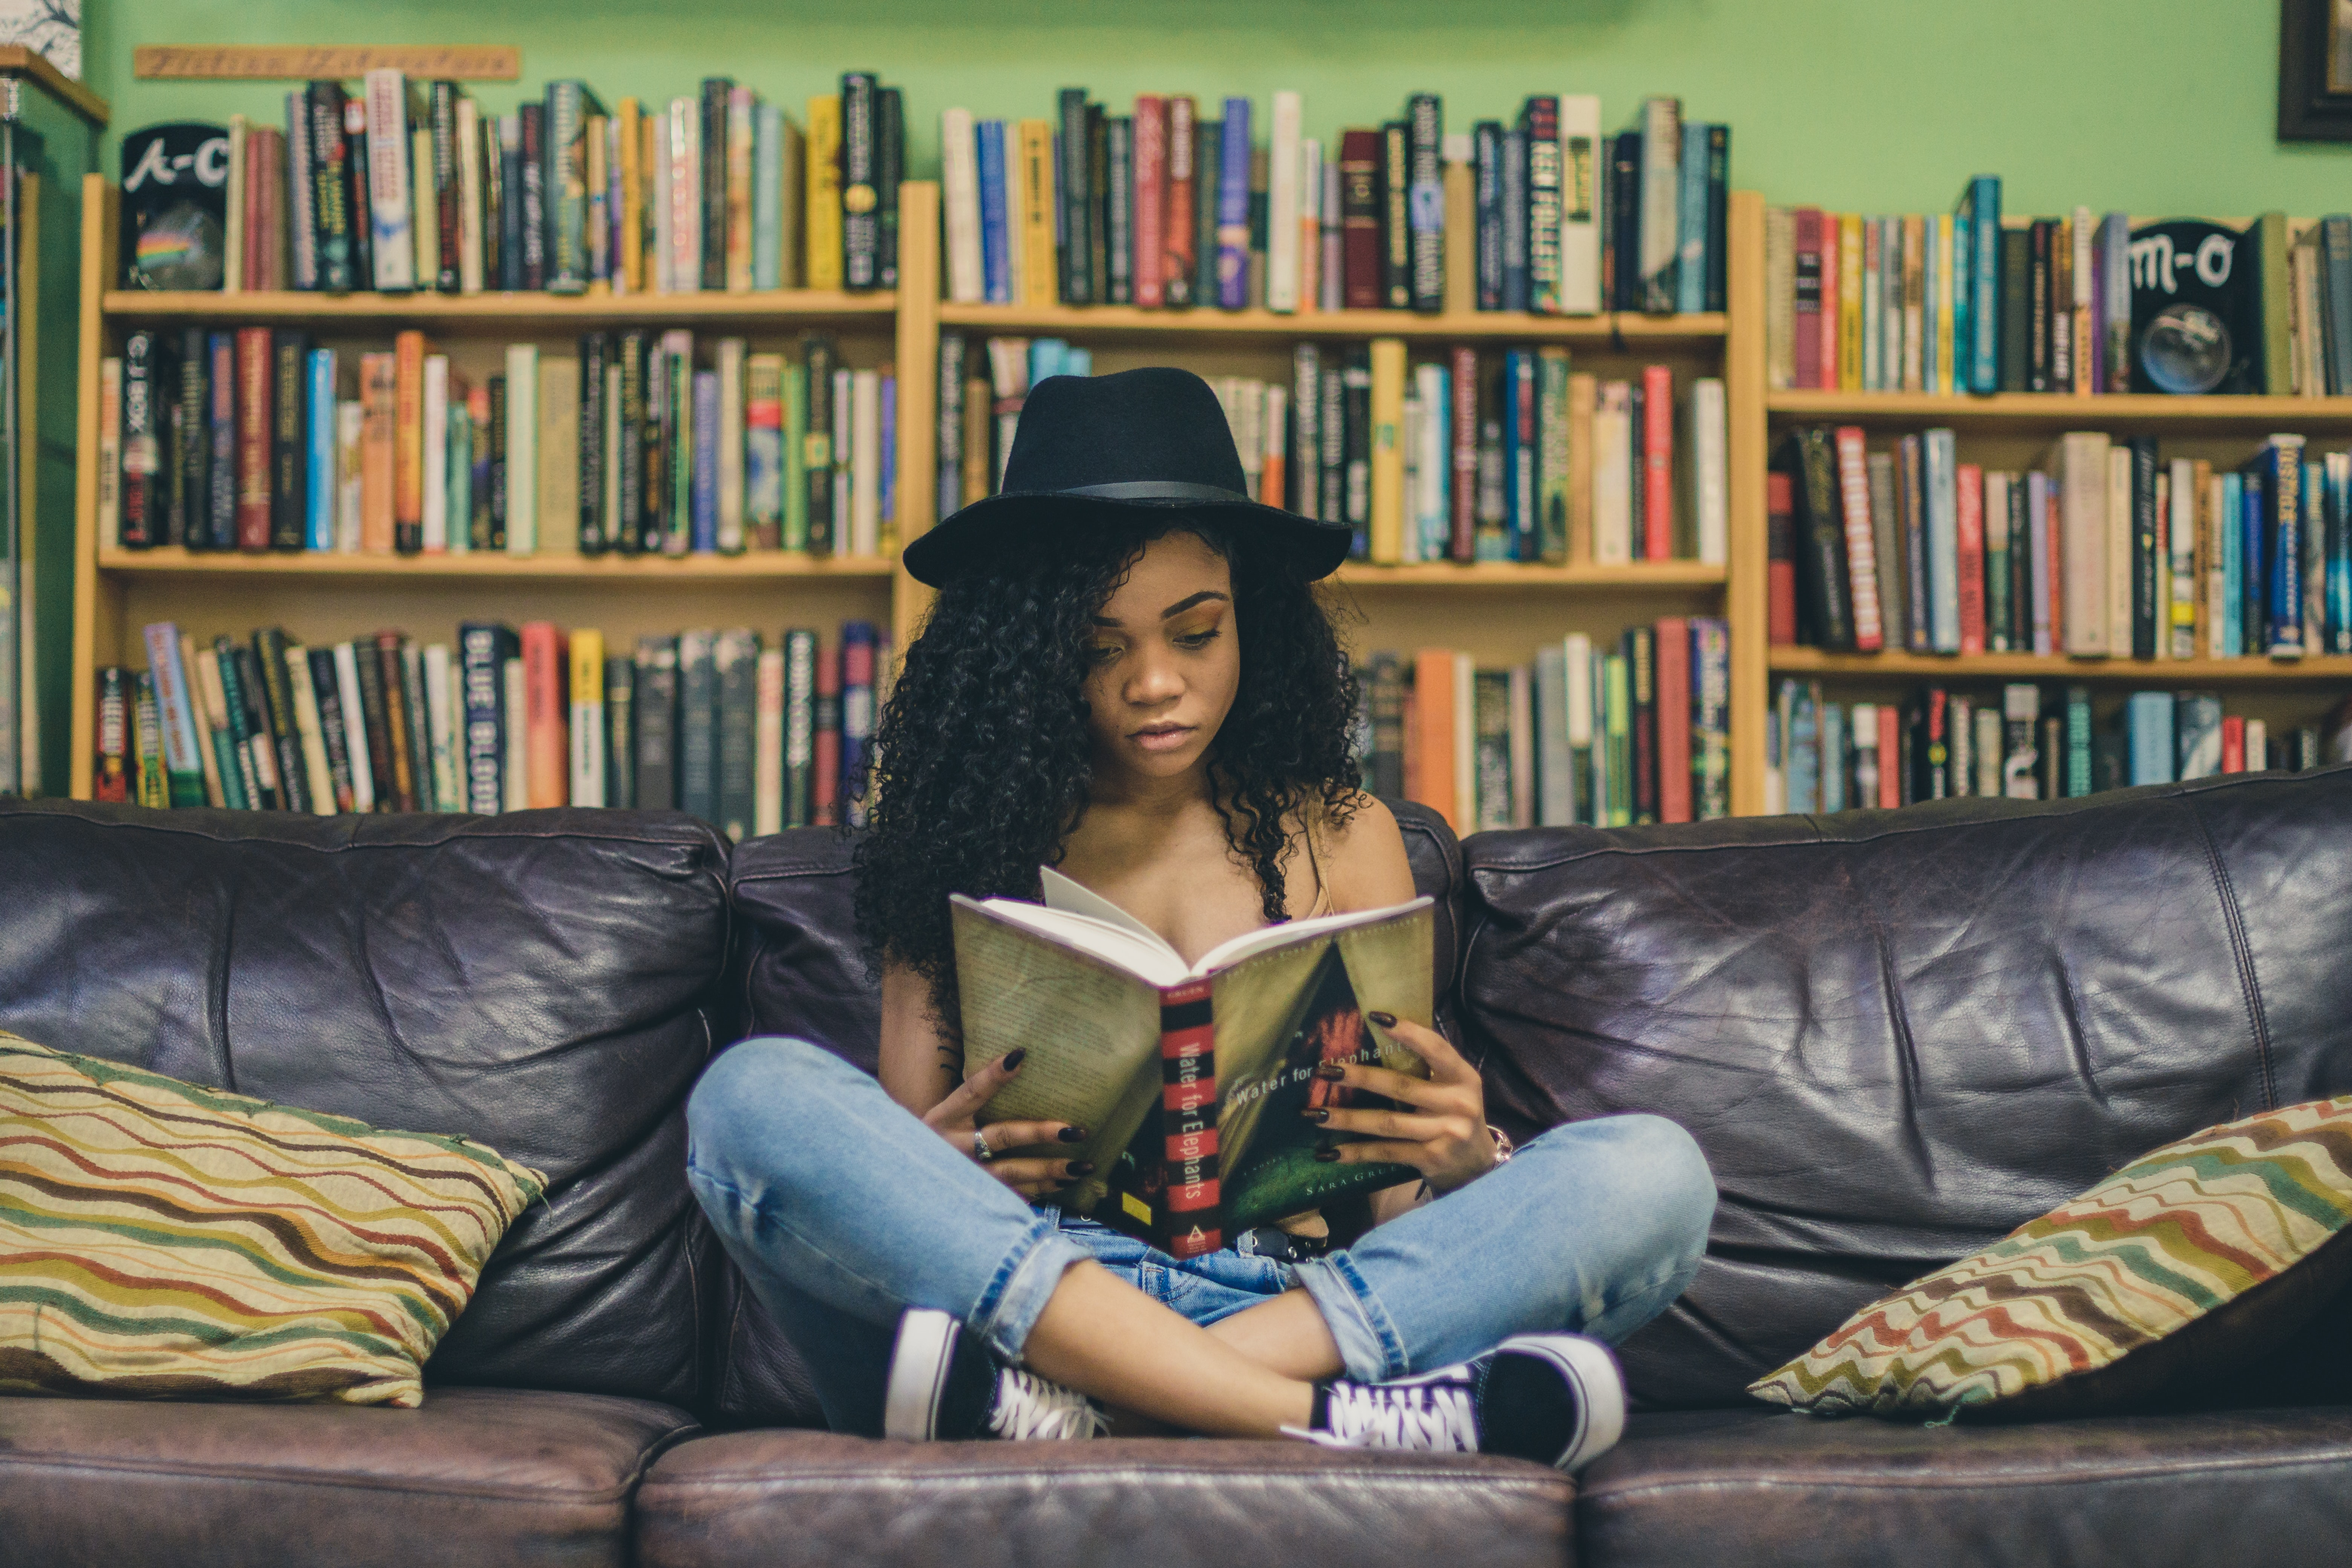
*Photo by [Seven Shooter](https://unsplash.com/@sevenshooterimage?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText) on [Unsplash](https://unsplash.com/s/photos/reading?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText)*

Amazon, as an organization, started on the premise of book sales, with the 'low cost and universal demand' of books as well as a business model that took advantage of the internet and its growth capabilities, the business succeeded early. 

In 2020, Amazon has been cemented in their role as one of the largest online retailer and books are still a significant portion of the companies' earnings, as a publisher and bookseller with the addition of their *Kindle* devices, books are still one of the products where the organisation is known for. 

In this report, we will look at the bestselling books on the Amazon platform, analyzing for patterns in the consumer data.

## Data Preparation

For this analysis, we will look at the top 50 bestselling books between 2009 and 2019, the dataset will be scraped from the [Amazon](https://www.amazon.com/gp/bestsellers/2009/books/ref=zg_bsar_cal_ye) website, cleaned then curated into two categories (Fiction and Non-fiction).

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [8]:
books = []
# Iterating through the decade, we scrape the books to populate our dataset 
for i in range(2009,2020):
  headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
  r = requests.get(f'https://www.amazon.com/gp/bestsellers/{i}/books/ref=zg_bsar_cal_ye', headers=headers)#, proxies=proxies)
  content = r.content
  soup = BeautifulSoup(content)
  # Isolating the information we want using the website's HTML  
  for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
    title = d.find('span', attrs={'class':'zg-text-center-align'})
    title1 = title.find('img', alt=True)
    author = d.find('a', attrs={'class':'a-size-small a-link-child'})
    book_rating = d.find('span', attrs={'class':'a-icon-alt'})
    no_of_reviews = d.find('a', attrs={'class':'a-size-small a-link-normal'})
    price = d.find('span', attrs={'class':'p13n-sc-price'})

    book=[]
    # Allowing for exceptions in the website formatting
    if (title is not None) & (title1 is not None):
      book.append(title1['alt'])
    else:
      book.append("unknown-product")

    if author is not None:
      book.append(author.text)
    elif author is None:
      author = d.find('span', attrs={'class':'a-size-small a-color-base'})
      if author is not None:
        book.append(author.text)
      else:
        book.append('0')

    if book_rating is not None:
      book.append(book_rating.text)
    else:
      book.append('-1')

    if no_of_reviews is not None:
      book.append(no_of_reviews.text)
    else:
      book.append('0')     

    if price is not None:
      book.append(price.text)
    else:
      book.append('0')
    # Appending the year and the final list  
    book.append(i)
    books.append(book)

In [9]:
dataset = pd.DataFrame(books, columns=['Name','Author', 'User Rating', 'Reviews','Price','Year'])
dataset.head()

Name       Author  ...   Price  Year
0                  StrengthsFinder 2.0       Gallup  ...  $17.30  2014
1          Frozen (Little Golden Book)    RH Disney  ...   $0.35  2014
2        Laugh-Out-Loud Jokes for Kids  Rob Elliott  ...   $4.99  2014
3               The Fault in Our Stars   John Green  ...   $7.69  2014
4  Diary of a Wimpy Kid: The Long Haul  Jeff Kinney  ...  $17.90  2014

[5 rows x 6 columns]

The dataset contains the 550 books needed, one for each year. However there is a need to clean and wrangle a format standard for beeter analysis

In [10]:
dataset['User Rating'] = dataset['User Rating'].apply(lambda x: str(x).split()[0])
dataset['User Rating'] = pd.to_numeric(dataset['User Rating'])
dataset["Price"] = dataset["Price"].str.replace('$', '')
dataset["Price"] = dataset["Price"].str.replace(',', '')
dataset['Price'] = dataset['Price'].apply(lambda x: x.split('.')[0])
dataset['Price'] = dataset['Price'].astype(int)
dataset["Reviews"] = dataset["Reviews"].str.replace(',', '')
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'], errors='ignore')
dataset.head()

Name       Author  ...  Price  Year
0                  StrengthsFinder 2.0       Gallup  ...     17  2014
1          Frozen (Little Golden Book)    RH Disney  ...      0  2014
2        Laugh-Out-Loud Jokes for Kids  Rob Elliott  ...      4  2014
3               The Fault in Our Stars   John Green  ...      7  2014
4  Diary of a Wimpy Kid: The Long Haul  Jeff Kinney  ...     17  2014

[5 rows x 6 columns]

In [11]:
# Exporting this scrapped dataset for curation
dataset.to_csv('amazon_bestselling_books_clean.csv', index=False, encoding='utf-8')

In order to categorize the books in this dataset, an outside website was needed as Amazon does not apply a unique categorization to the books, for example, a book like '12 Rules for Life: An Antidote to Chaos' by *Jordan B. Peterson* can show up in five separate book categories on Amazon; 'Business & Money', 'Health, Fitness & Dieting', 'Politics & Social Sciences', 'Reference', and 'Self-Help'.

Using information from [Goodreads](https://www.goodreads.com/), a book review and recommendation website, we can categorize the bestselling books on the general categories for books, Fiction and Non-fiction. 

In [12]:
# The dataset was curated with Excel with information gotten from Goodreads
categorized_df = pd.read_csv('/content/bestsellers with categories.csv')
categorized_df.head()

Name  ...        Genre
0                      10-Day Green Smoothie Cleanse  ...  Non Fiction
1                                  11/22/63: A Novel  ...      Fiction
2            12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
3                             1984 (Signet Classics)  ...      Fiction
4  5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction

[5 rows x 7 columns]

In [13]:
categorized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


*This dataset has been uploaded on [Kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019) as an open source for others who need it.*

## Data Analysis

As we have our dataset cleaned with all the columns needed for analysis, we can begin indepth investigations into the top 50 bestselling books on Amazon from 2009 - 2019.

In [14]:
# Importing visualization packages
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
# Setting templates for visualizations
style.use('ggplot')
sns.set_context("poster")
sns.set_palette("Paired")

In [15]:
categorized_df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [16]:
categorized_df['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

There are more non-fiction books in the bestselling rankings, with about 56% of the bestselling dataset belonging to non-fiction books, this includes everything from memoirs to art and photography books.

### Book Ratings

In [17]:
# Top rated books (Revieved by at least 3000 people)
data_order = categorized_df.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews']].mean()
data_order = data_order[data_order['Reviews']>3000]
data_order = data_order.sort_values('User Rating', ascending=False).head(20)
data_order

Name  ...  Reviews
177                        Obama: An Intimate Portrait  ...   3192.0
71   Dog Man: Lord of the Fleas: From the Creator o...  ...   5470.0
118  Harry Potter and the Goblet of Fire: The Illus...  ...   7758.0
119  Harry Potter and the Prisoner of Azkaban: The ...  ...   3146.0
120  Harry Potter and the Sorcerer's Stone: The Ill...  ...  10052.0
112                           Hamilton: The Revolution  ...   5867.0
108  Goodnight, Goodnight Construction Site (Hardco...  ...   7038.0
66   Dog Man and Cat Kid: From the Creator of Capta...  ...   5062.0
36            Brown Bear, Brown Bear, What Do You See?  ...  14344.0
312                   The Wonderful Things You Will Be  ...   8842.0
67   Dog Man: A Tale of Two Kitties: From the Creat...  ...   4786.0
208             Strange Planet (Strange Planet Series)  ...   9382.0
68   Dog Man: Brawl of the Wild: From the Creator o...  ...   7235.0
69   Dog Man: Fetch-22: From the Creator of Captain...  ...  12619.0
70   Dog Man: For Whom the Ball Rolls: From the Cre...  ...   9089.0
116  Harry Potter and the Chamber of Secrets: The I...  ...  19622.0
197  Rush Revere and the First Patriots: Time-Trave...  ...   3836.0
349       Wrecking Ball (Diary of a Wimpy Kid Book 14)  ...   9413.0
196  Rush Revere and the Brave Pilgrims: Time-Trave...  ...   7150.0
267               The Legend of Zelda: Hyrule Historia  ...   5396.0

[20 rows x 5 columns]

Ranking by rating gives a relatively high number of max (4.9) ratings, however, we can see significant differences in the number of reviews, with some books having just over 3000 reviews while some have about 20,000.

A weighted rating, that takes into consideration the number of reviews, will be a better option for this ranking.

$$WeightedRating(WR)=(\frac{v}{v+m}\cdot R)+(\frac{m}{v+m}\cdot C)$$

*where R = average rating for the book*

*v = number of reviews for the book*

*m = minimum reviews required to be listed in the best seller list*

*C = the mean rating in the dataset* 

In [18]:
# Weighted rating
m = min(categorized_df['Reviews'])
C = categorized_df['User Rating'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [19]:
categorized_df['Weighted Rating'] = categorized_df.apply(weighted_rating, axis=1)

In [20]:
categorized_df.groupby(['Name','Author','Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

Name  ... Weighted Rating
178                          Oh, the Places You'll Go!  ...        4.899524
116  Harry Potter and the Chamber of Secrets: The I...  ...        4.899470
140  Jesus Calling: Enjoying Peace in His Presence ...  ...        4.899469
310                        The Very Hungry Caterpillar  ...        4.899468
36            Brown Bear, Brown Bear, What Do You See?  ...        4.899275
69   Dog Man: Fetch-22: From the Creator of Captain...  ...        4.899177
151  Last Week Tonight with John Oliver Presents A ...  ...        4.899126
120  Harry Potter and the Sorcerer's Stone: The Ill...  ...        4.898967
349       Wrecking Ball (Diary of a Wimpy Kid Book 14)  ...        4.898897
208             Strange Planet (Strange Planet Series)  ...        4.898894

[10 rows x 6 columns]

While a number of rows in the weighted rating column can still be rounded up to 4.9, there is enough of a difference between the various books that they can be ranked. 

As an aside, Nine of the the Top 10 books, according to the weighted rankings are in the fiction genre. This could be taken as a sign of the fiction genre's dominance in rating rankings.

Text(0.5, 1.0, 'Top 10 Books by Average Weighted Rating')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


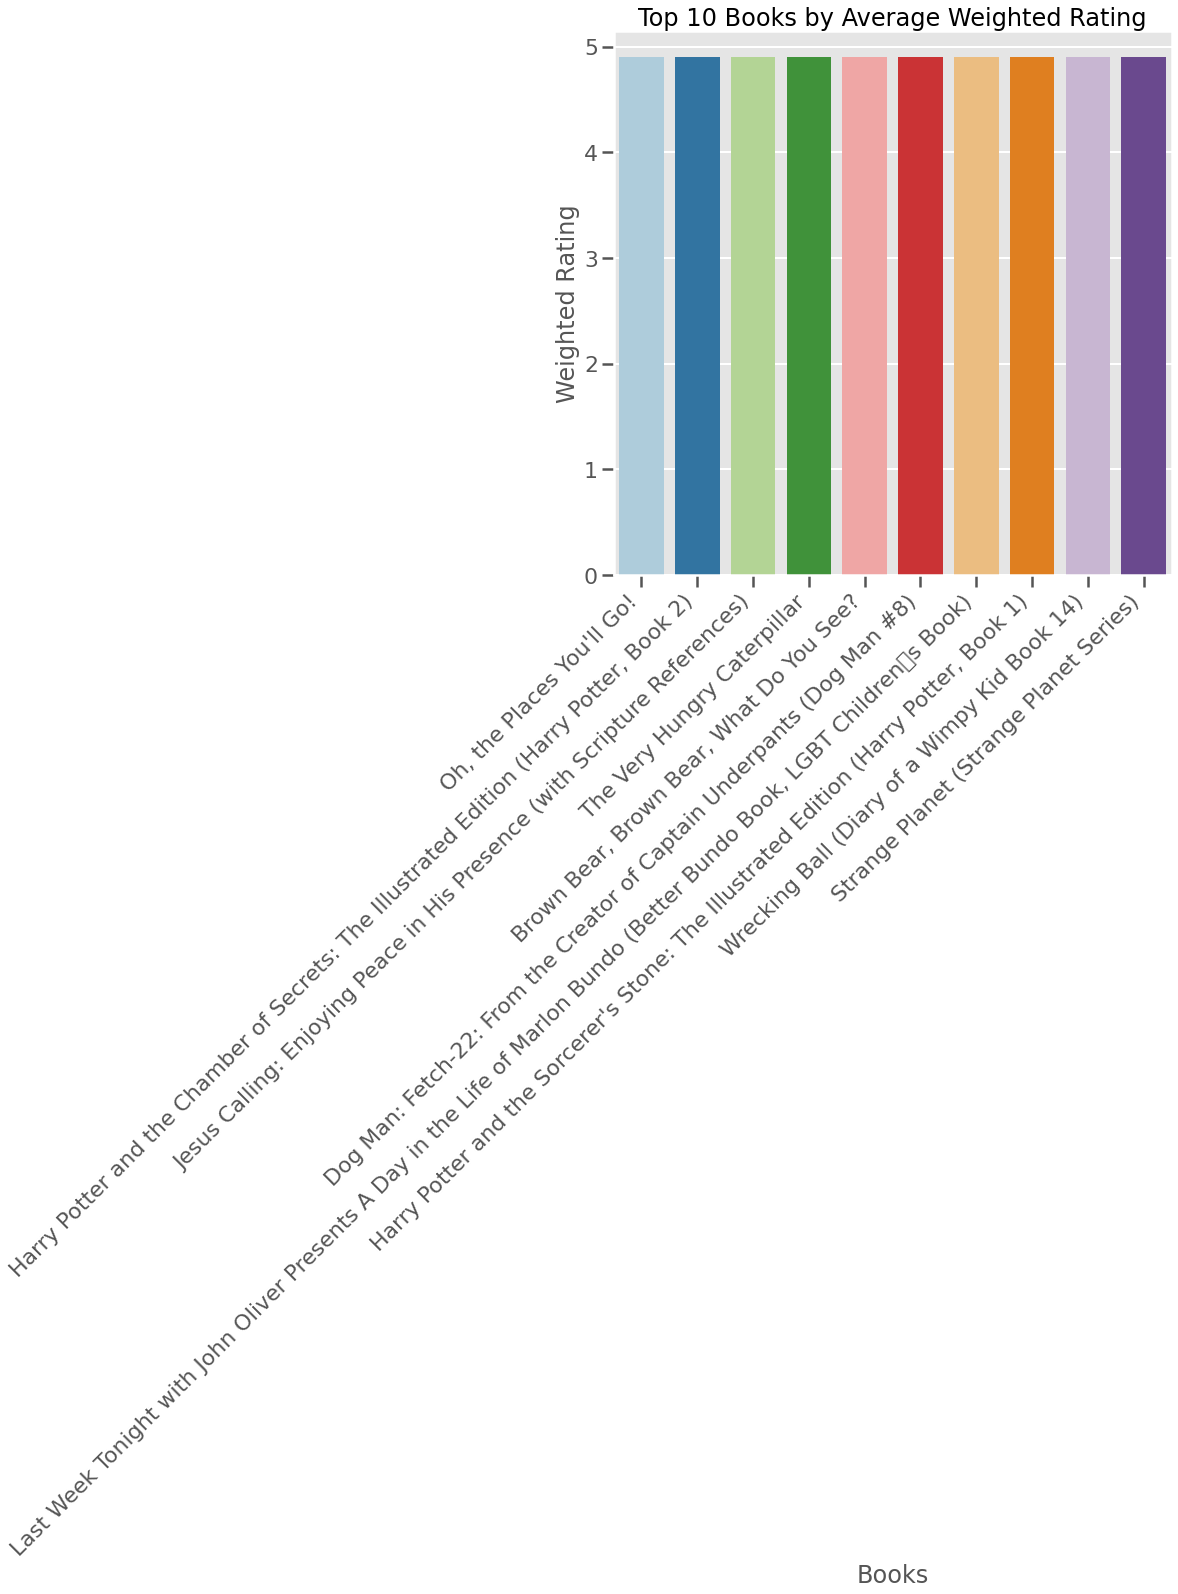

In [21]:
order=categorized_df.groupby(['Name'], as_index=False)['Weighted Rating'].mean().sort_values('Weighted Rating', ascending=False).head(10)
plt.figure(figsize=(10,10))
chart = sns.barplot(data=order, x='Name',y='Weighted Rating')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Weighted Rating')
chart.set_xlabel('Books')
chart.set_title('Top 10 Books by Average Weighted Rating')

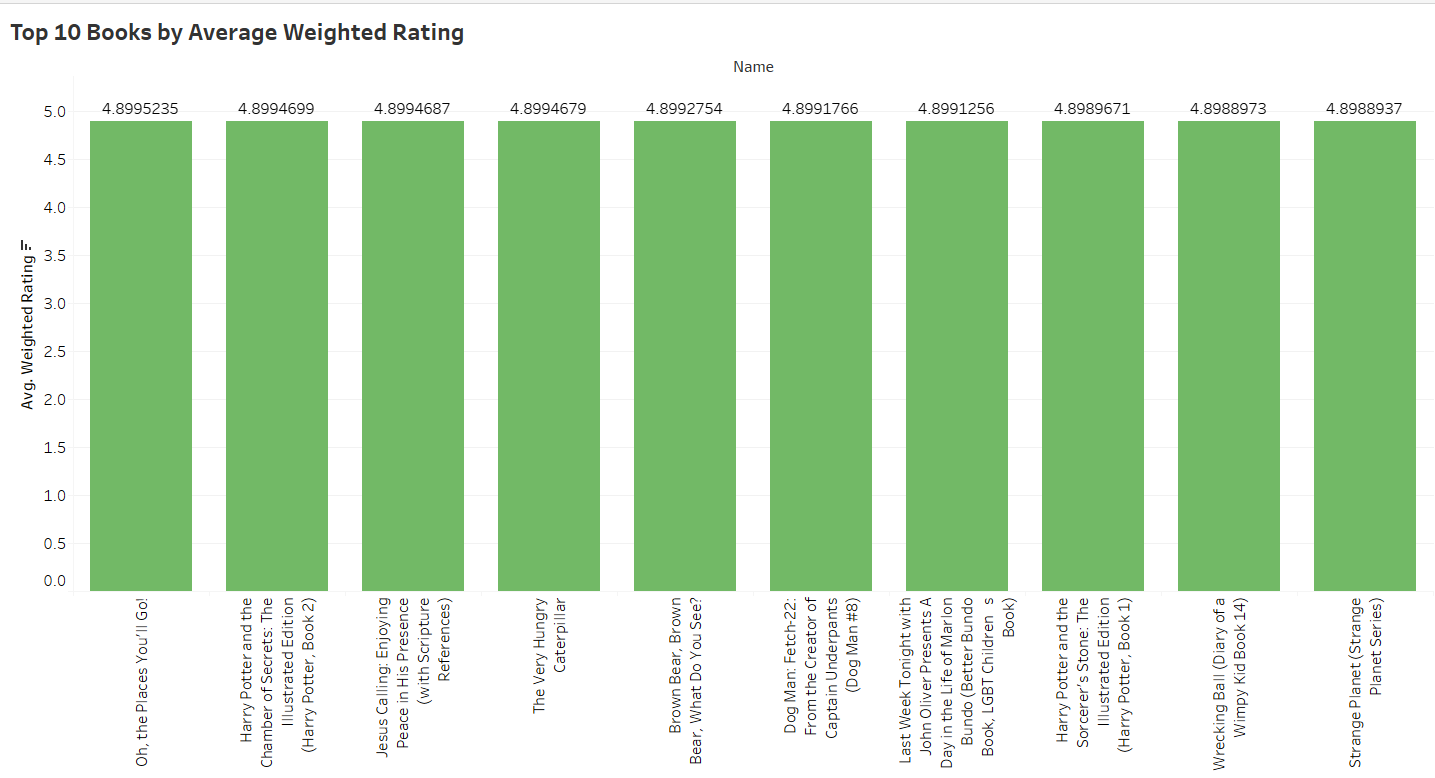

Dr. Seuss's 'Oh, the Places You'll Go!' comes out on top of the Weighted Rating rankings by an edge, with 21,834 reviews and a number of them overwhelmingly positive. Originally published in 1990, the "Children's literature" book has been well liked by most people who purchase it.

Text(0.5, 1.0, 'Top 10 Authors by Average Weighted Rating')

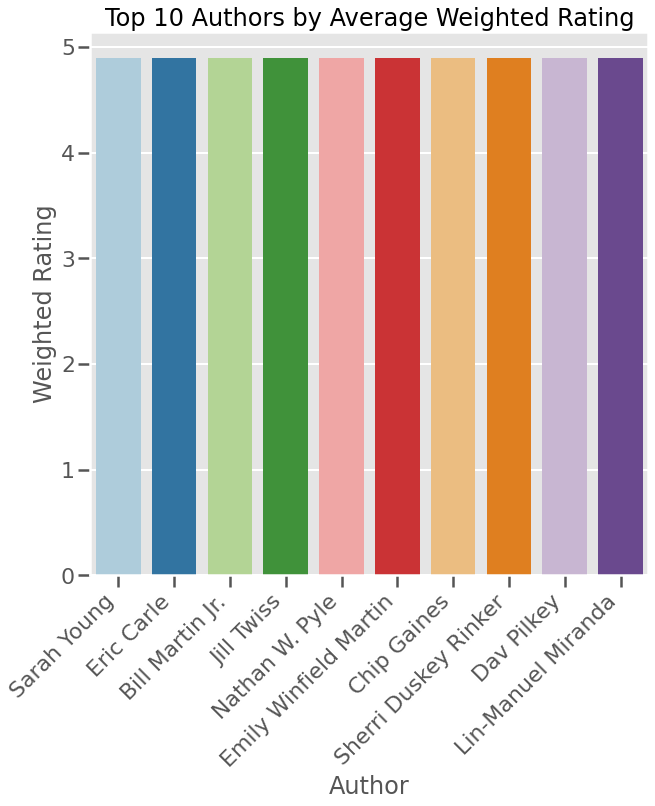

In [22]:
order=categorized_df.groupby(['Author'], as_index=False)['Weighted Rating'].mean().sort_values('Weighted Rating', ascending=False).head(10)
plt.figure(figsize=(10,10))
chart = sns.barplot(data=order, x='Author',y='Weighted Rating')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Weighted Rating')
chart.set_xlabel('Author')
chart.set_title('Top 10 Authors by Average Weighted Rating')

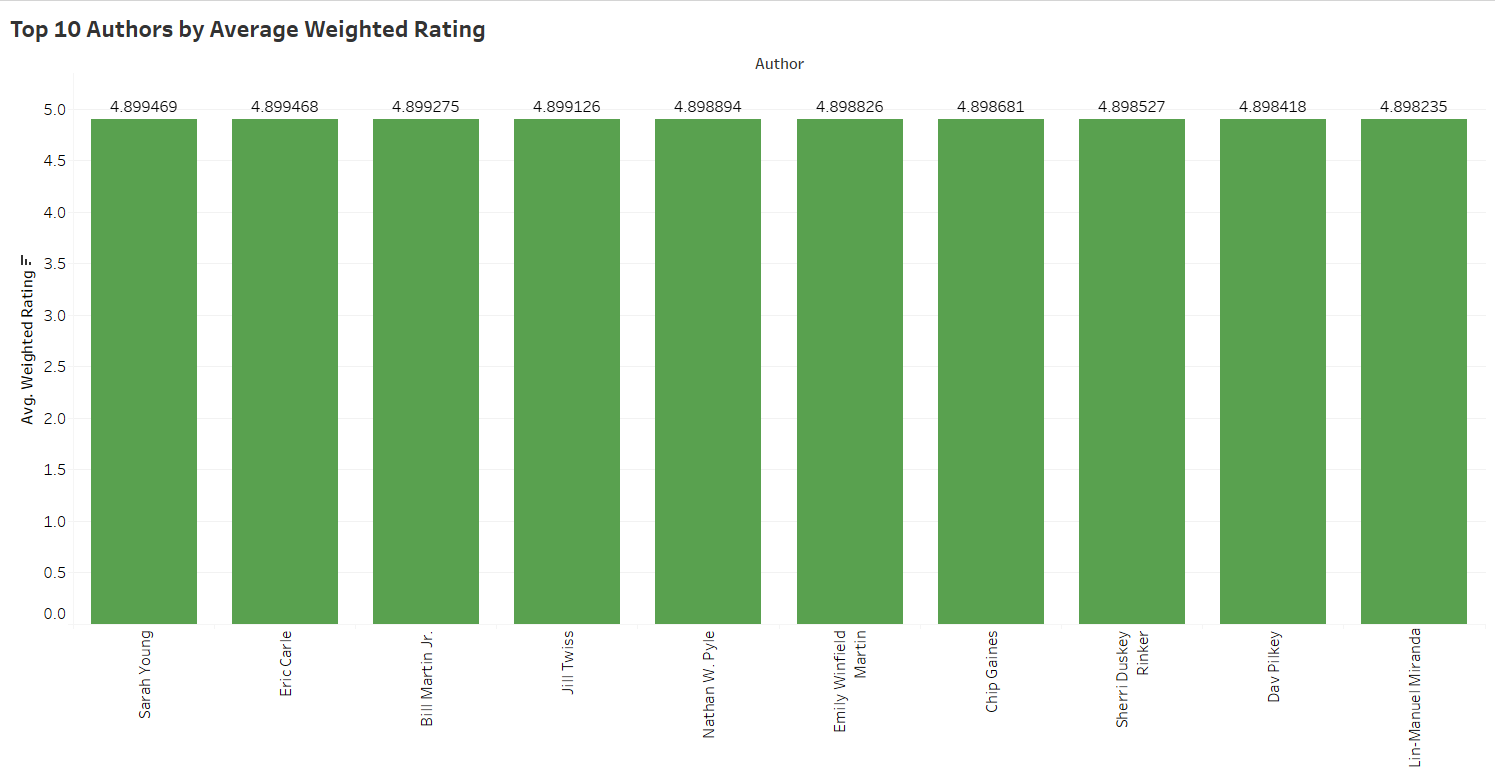

Sarah Young with her sole entry in the Top 50 Bestselling books, 'Jesus Calling: Enjoying Peace in His Presence (with Scripture References)' tops the ranking for Authors in Weighted Ratings. The 2004 Christian literature, Inspirational was reviewed 19,576 times

In [23]:
categorized_df.groupby(['Genre'])['Weighted Rating'].mean()

Genre
Fiction        4.648178
Non Fiction    4.595980
Name: Weighted Rating, dtype: float64

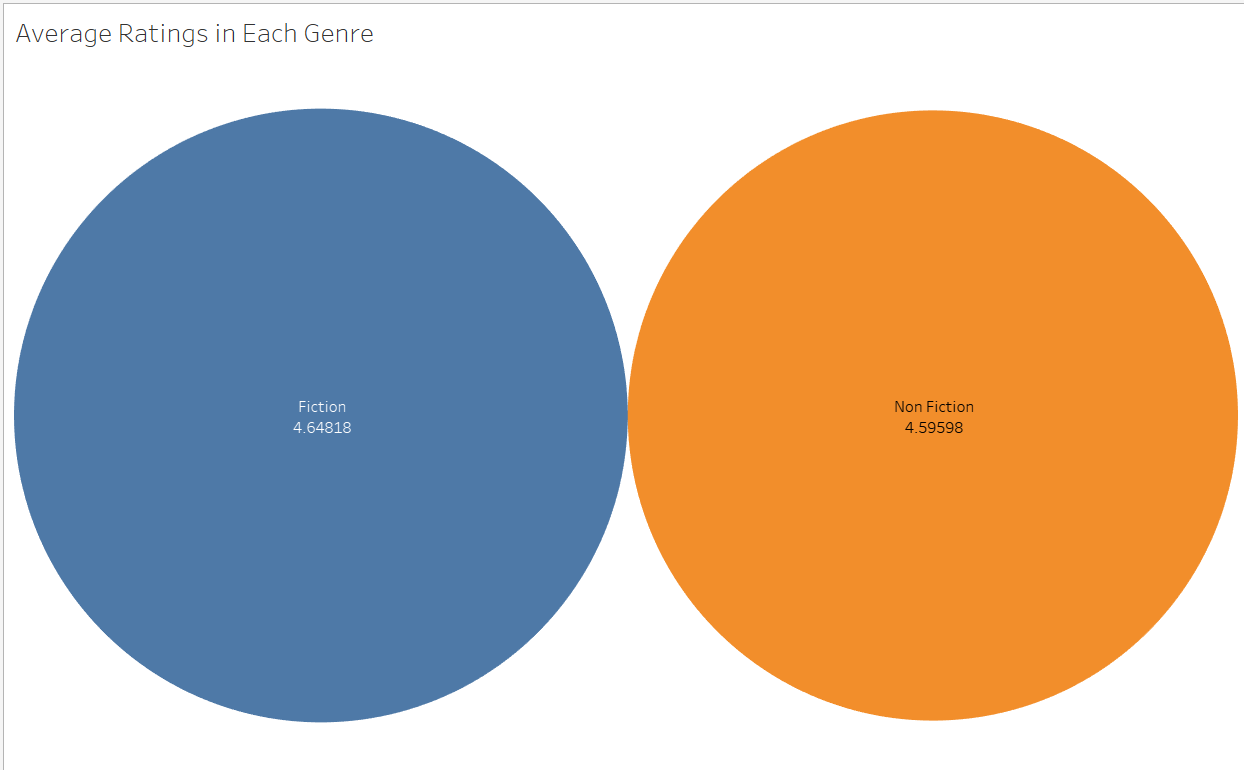

On average, bestselling books in the Fiction genre are rated higher than their counterparts in Non-fiction

### Book Price

Here, we will look at patterns in book price in the Top 50 Bestselling books on Amazon

In [24]:
categorized_df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)

Name  ...  Price
56   Diagnostic and Statistical Manual of Mental Di...  ...  105.0
307                       The Twilight Saga Collection  ...   82.0
112                           Hamilton: The Revolution  ...   54.0
228  The Book of Basketball: The NBA According to T...  ...   53.0
115         Harry Potter Paperback Box Set (Books 1-7)  ...   52.0
191  Publication Manual of the American Psychologic...  ...   46.0
333                                           Watchmen  ...   42.0
281                       The Official SAT Study Guide  ...   40.0
220                                      The Alchemist  ...   39.0
282  The Official SAT Study Guide, 2016 Edition (Of...  ...   36.0

[10 rows x 4 columns]

There are 6 non-fiction books out of the top 10 most expensive bestsellers on Amazon. Looking at the rankings, the fiction books in the Top 5 are collections or combinations of a book series, while the non-fiction books are instructional, educational texts. Both genres are priced expensively because of their larger size (relatively large amount of pages).

Text(0.5, 1.0, 'Top 10 Most Expensive Bestselling Amazon Books')

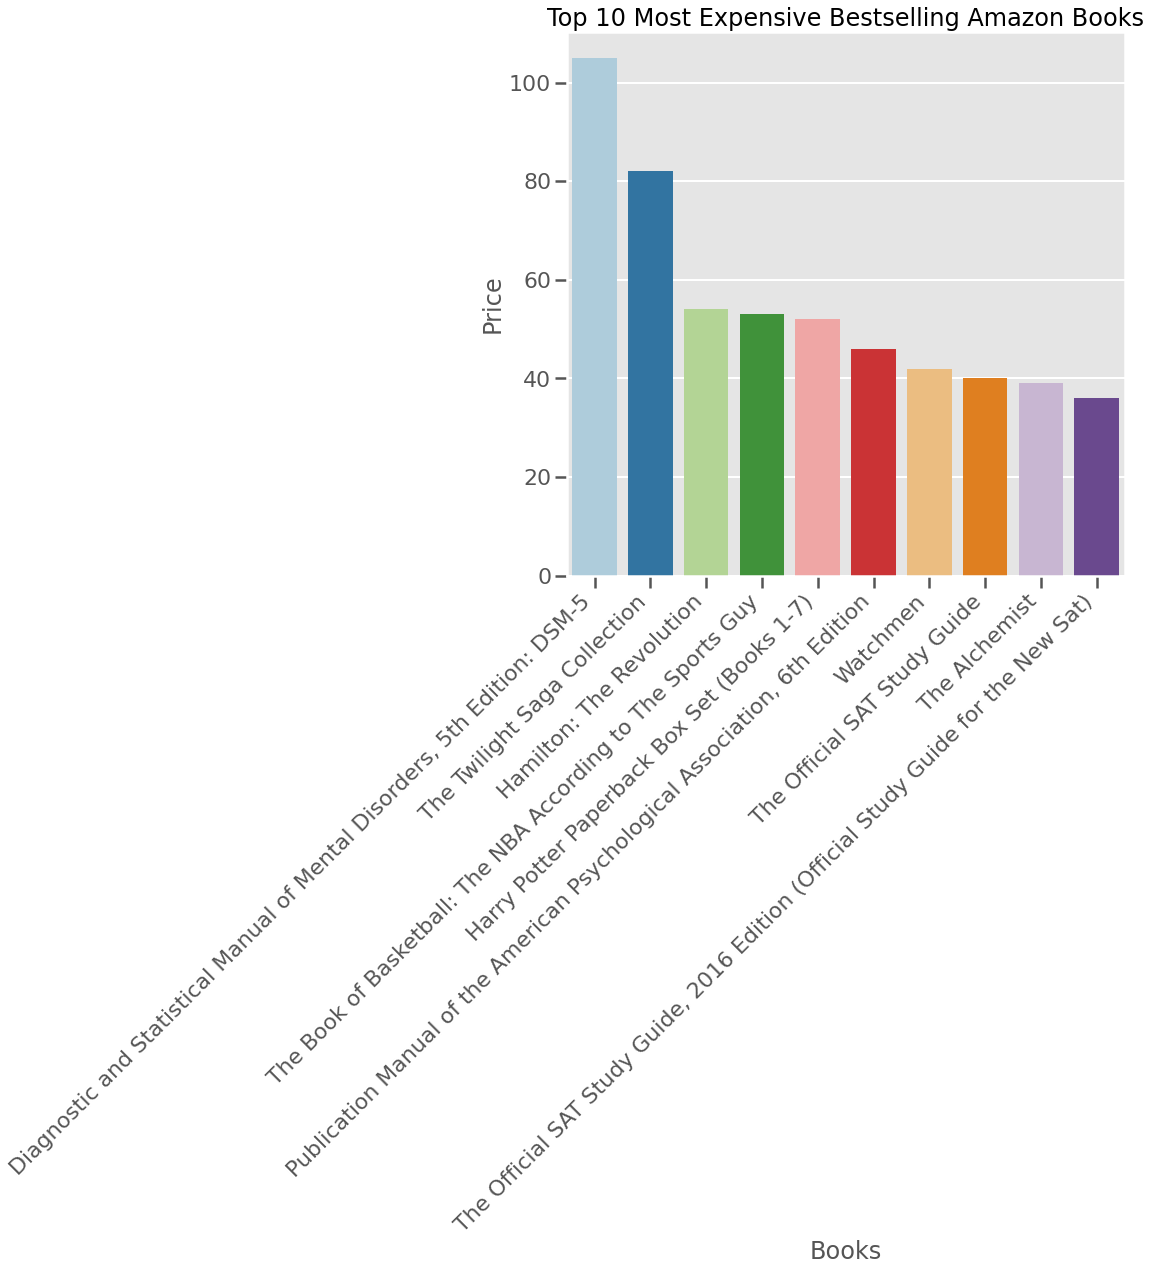

In [25]:
order=categorized_df.groupby(['Author', 'Name'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)
plt.figure(figsize=(10,10))
chart = sns.barplot(data=order, x='Name',y='Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Price')
chart.set_xlabel('Books')
chart.set_title('Top 10 Most Expensive Bestselling Amazon Books')

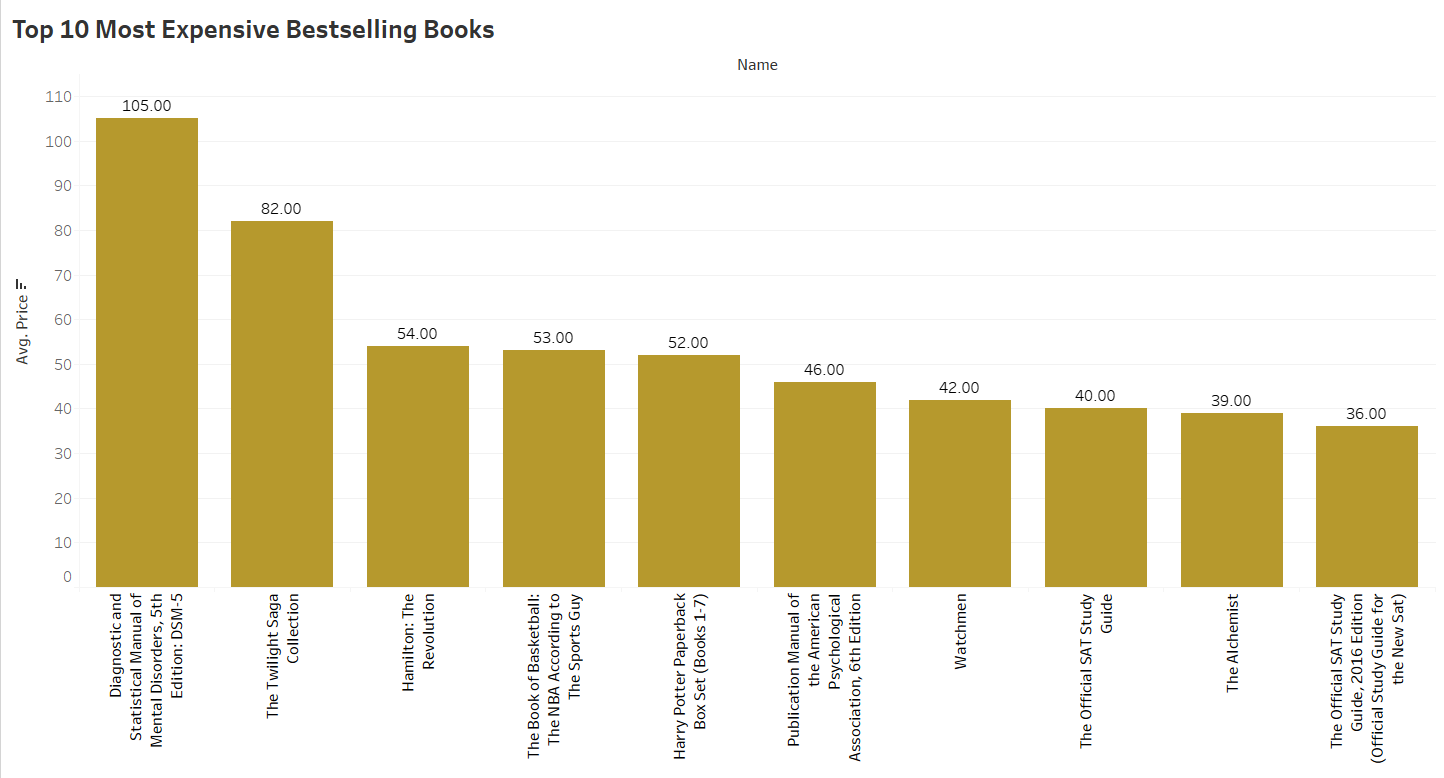

The Diagnostic and Statistical Manual of Mental Disorders (5th edition), DSM-5, comes out on top as the most expensive bestselling book, as a relatively large publication that is useful in a number of medical professions, this ranking can be seen to be right. Originally published in 2013 with about a thousand pages, it beats its newer edition (DSM-VI) by 5 spots on the price ranking.  

Text(0.5, 1.0, 'Top 10 Authors with the Highest Average Price')

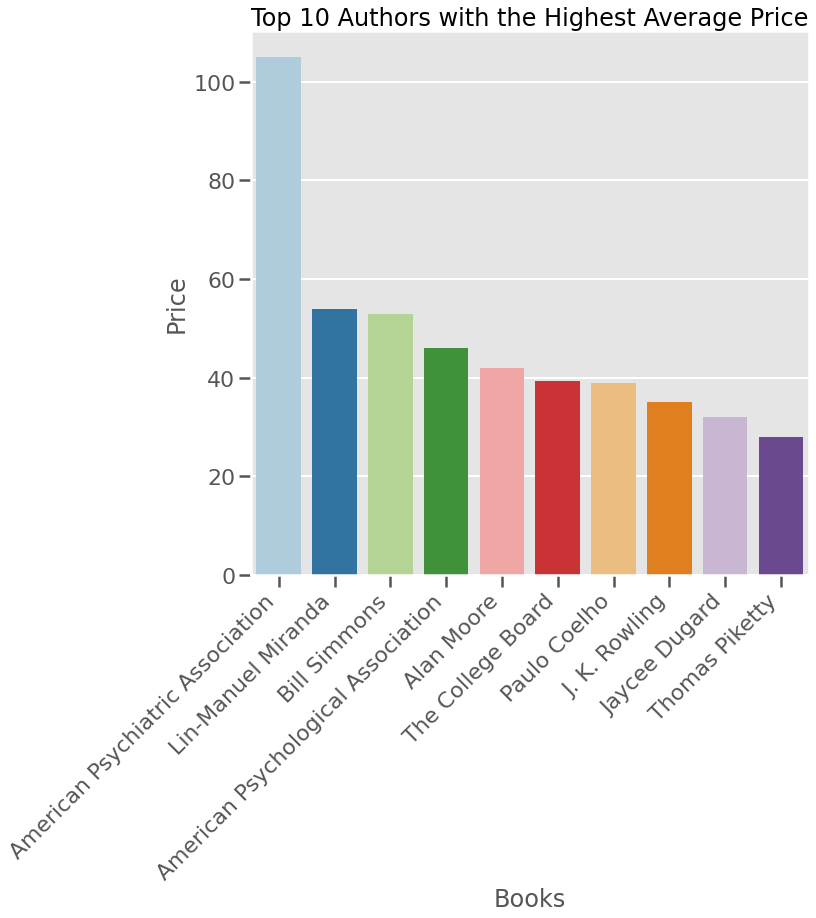

In [26]:
order=categorized_df.groupby(['Author'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)
plt.figure(figsize=(10,10))
chart = sns.barplot(data=order, x='Author',y='Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Price')
chart.set_xlabel('Books')
chart.set_title('Top 10 Authors with the Highest Average Price')

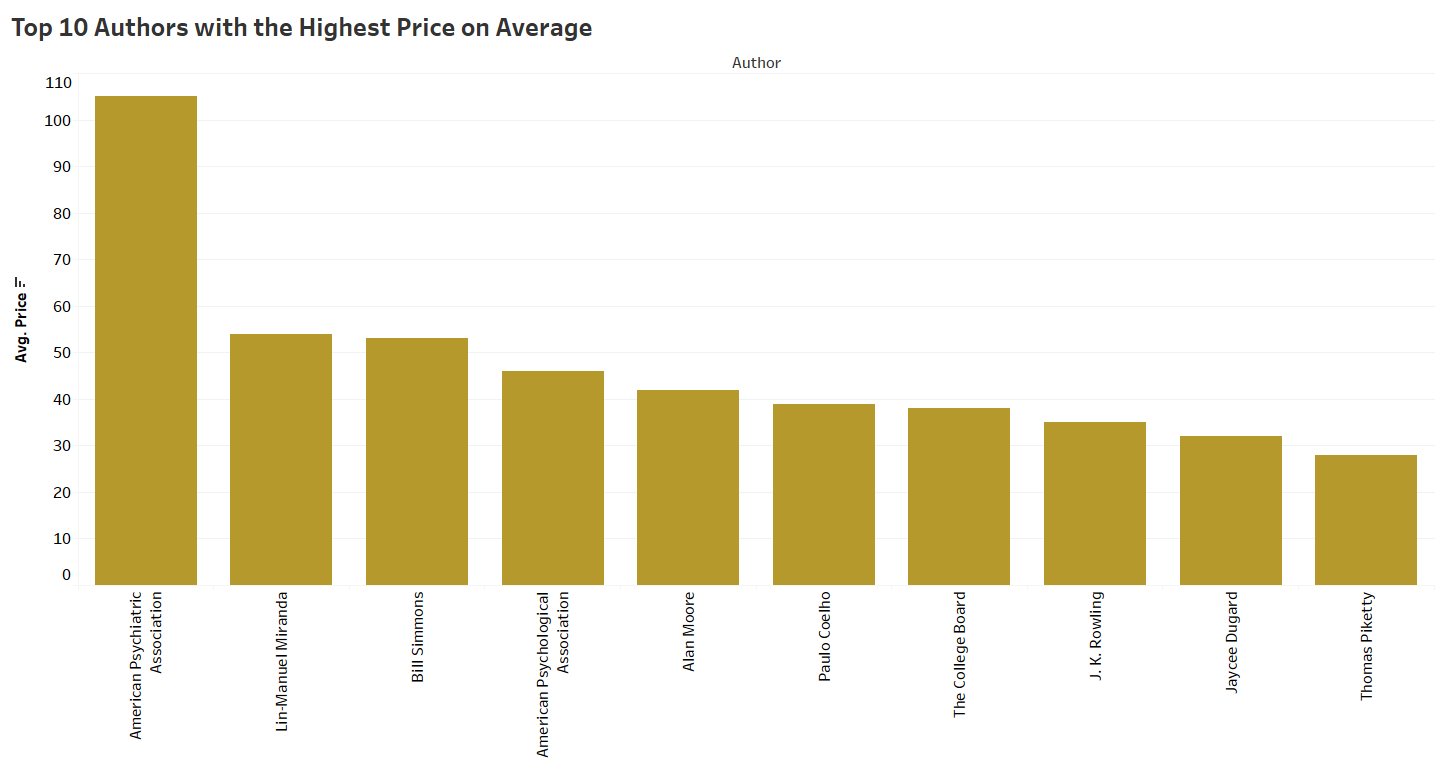

In [27]:
categorized_df.groupby(['Genre'], as_index=False)['Price'].mean()

Genre      Price
0      Fiction  10.850000
1  Non Fiction  14.841935

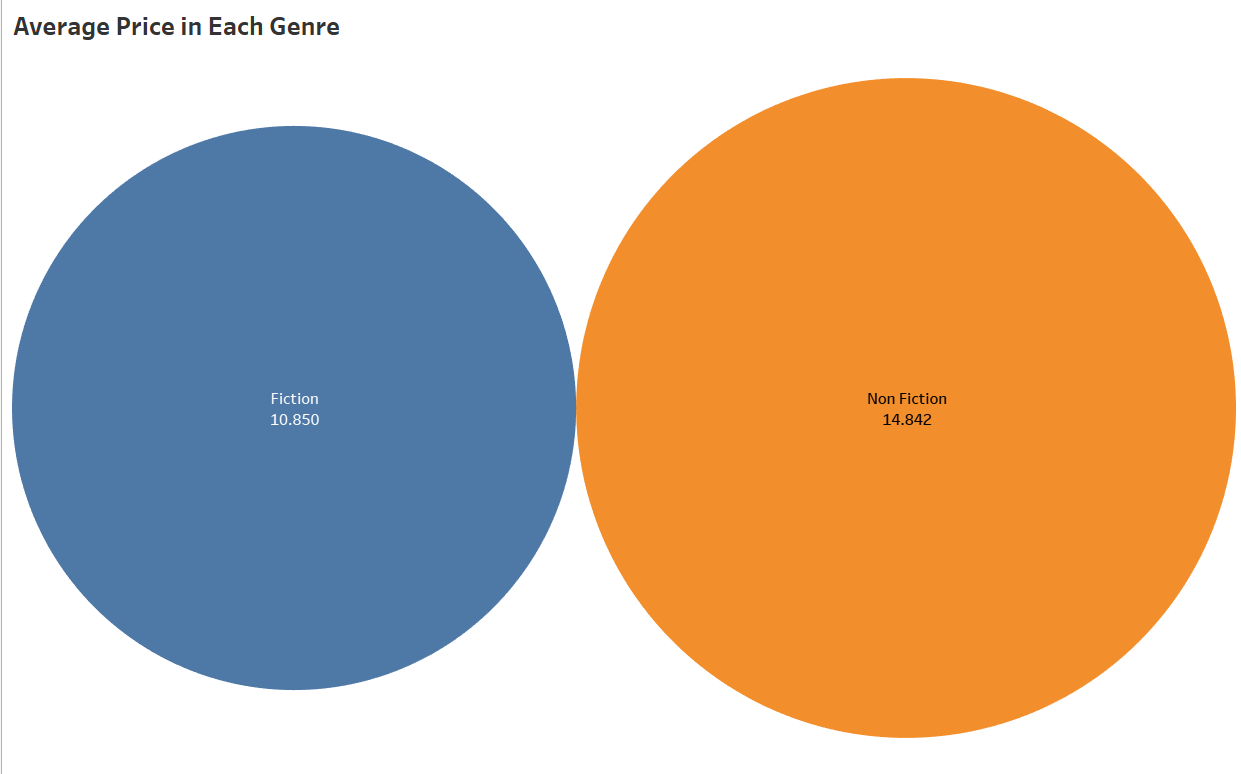

On average, non-fiction publications cost more than their fictional counterparts. Considering educational textbooks for all professions and fields, history texts and other instructional publications fall under non-fiction, there is a definite tendency for non-fiction books to cost more.

### Number of Reviews

Here we look at the patterns in the number of reviews on books in the Top 50 bestselling rankings

In [28]:
# Most Reviewed 
categorized_df.groupby(['Author','Name', 'Genre'],as_index=False)[['Weighted Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

Author  ...  Reviews
87      Delia Owens  ...  87841.0
243   Paula Hawkins  ...  79446.0
231  Michelle Obama  ...  61133.0
128   Gillian Flynn  ...  57271.0
182      John Green  ...  50482.0
200  Kristin Hannah  ...  49288.0
100       E L James  ...  47265.0
15        Andy Weir  ...  39459.0
21    Anthony Doerr  ...  36348.0
245    Paulo Coelho  ...  35799.0

[10 rows x 5 columns]

Nine out of ten books on the bestsellers with the most reviews on average are from the fiction genre. As this ranking looks at average reviews, non-fiction books which may not frequently come in series are not disadvantaged, however only Michelle Obama's Becoming had more than 36,000 reviews on average in the non-fiction genre.  

Text(0.5, 1.0, 'Top 10 Authors with the Most Average Reviews and their  Ratings')

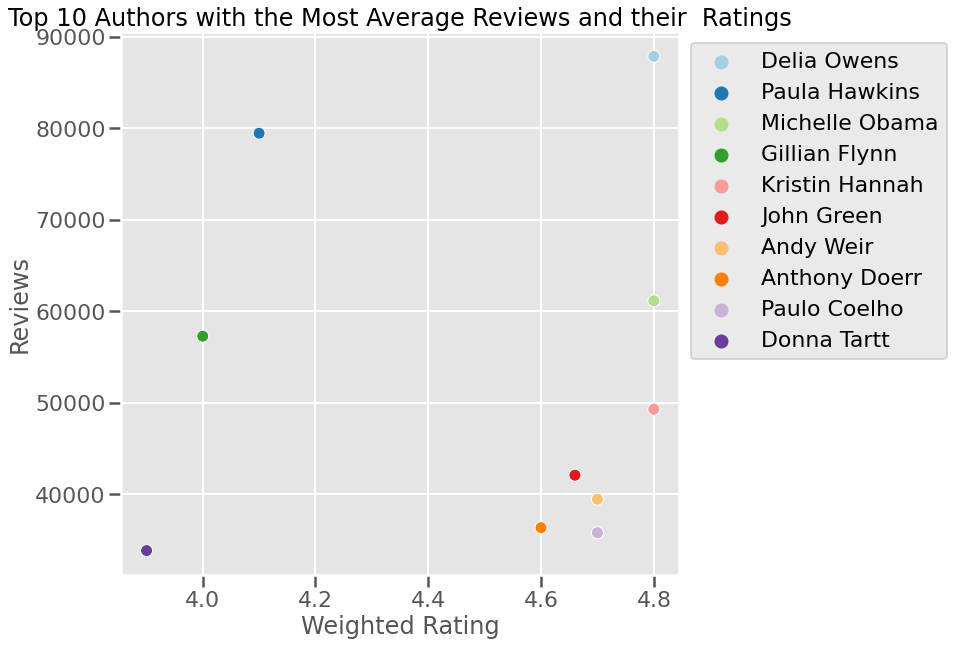

In [29]:
order1 = categorized_df.groupby(['Author'],as_index=False)[['Weighted Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)
plt.figure(figsize=(10,10))
chart=sns.scatterplot(data=order1,x='Weighted Rating', y='Reviews',hue='Author')
chart.legend(loc='upper right',bbox_to_anchor=(1.5,1))
chart.set_title('Top 10 Authors with the Most Average Reviews and their  Ratings')

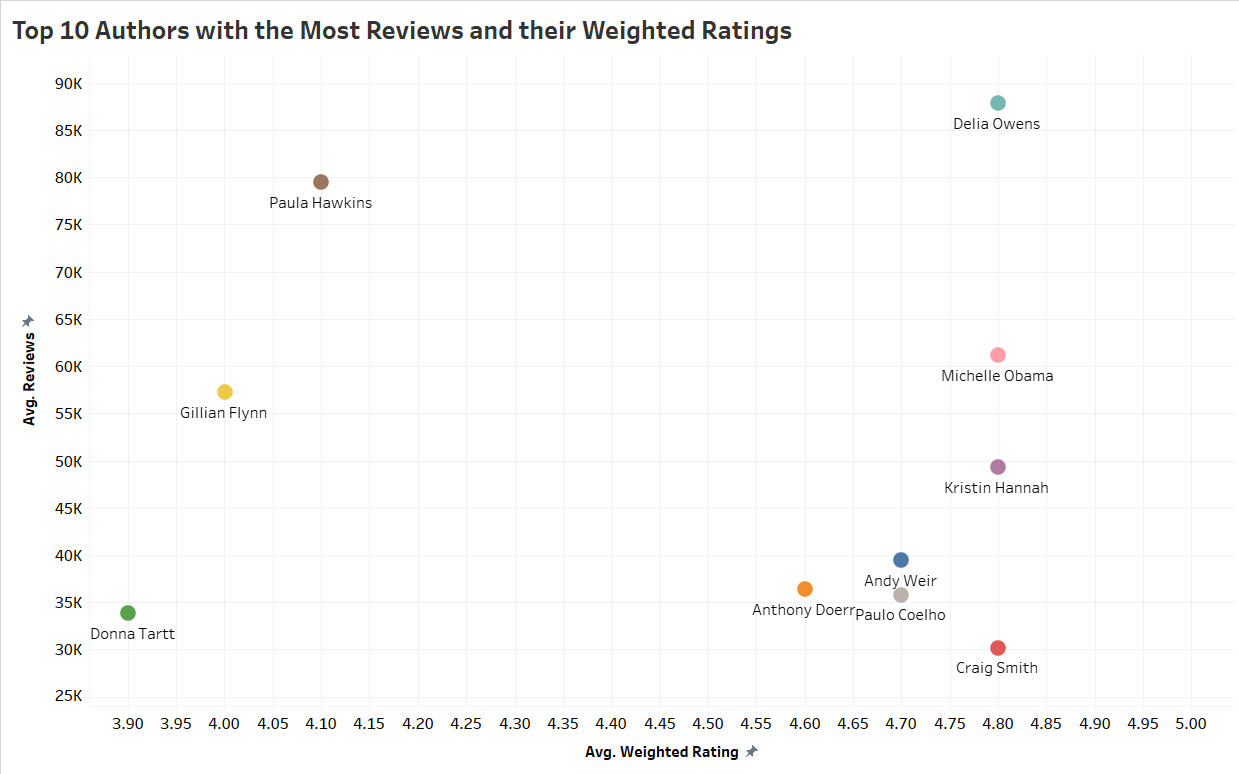

Delia Owens' 'Where the Crawdads Sing' tops the ranking for average number of reviews, it was also rated highly with a weighted ranking of 4.8. Originally published in 2018, the 'Mystery' book with just one year on the bestselling list was critically acclaimed.

Text(0.5, 1.0, 'Top 10 Books with the Most Reviews')

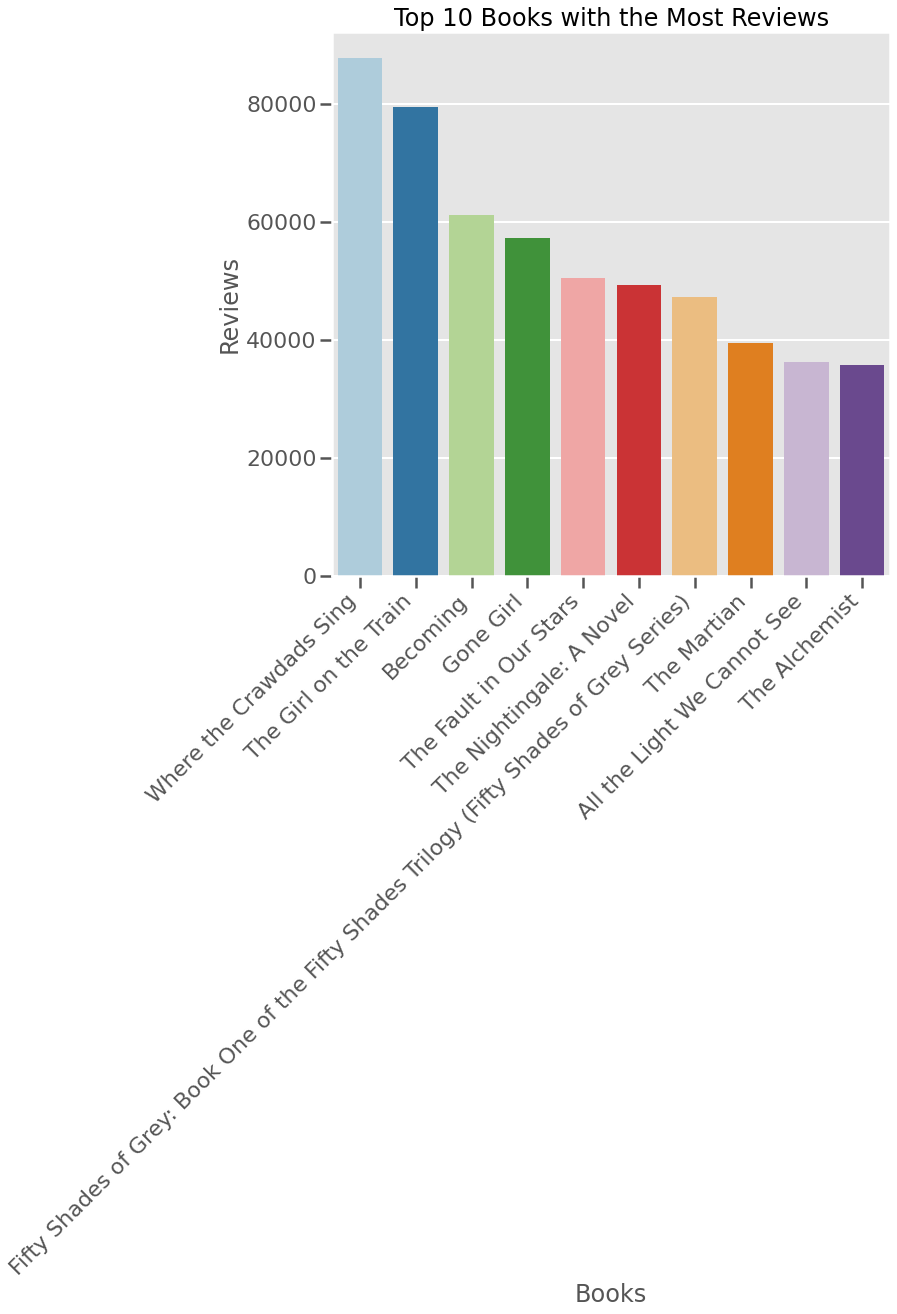

In [30]:
order=categorized_df.groupby(['Name'], as_index=False)['Reviews'].mean().sort_values('Reviews', ascending=False).head(10)
plt.figure(figsize=(10,10))
chart = sns.barplot(data=order, x='Name',y='Reviews')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Reviews')
chart.set_xlabel('Books')
chart.set_title('Top 10 Books with the Most Reviews')

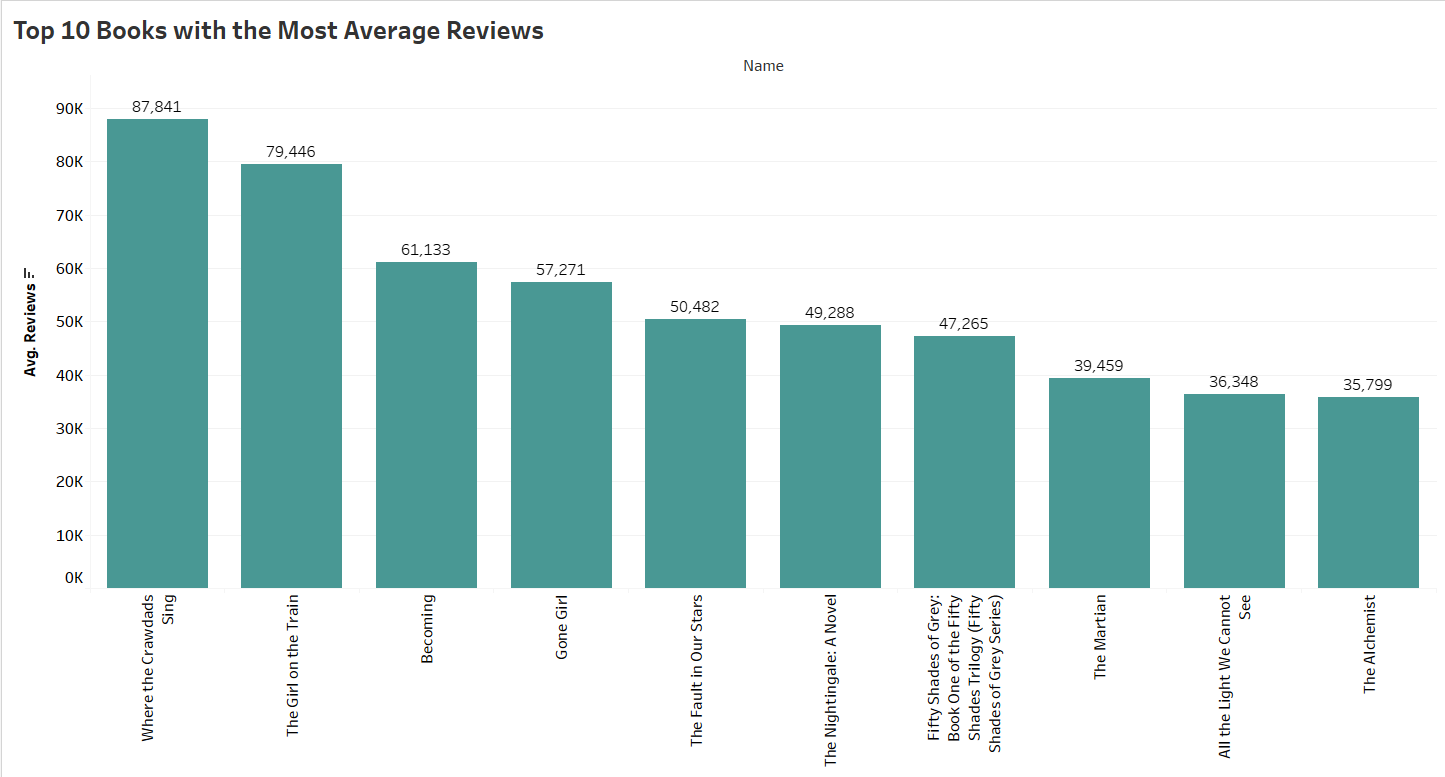

In [31]:
categorized_df.groupby(['Genre'])['Reviews'].mean()

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64

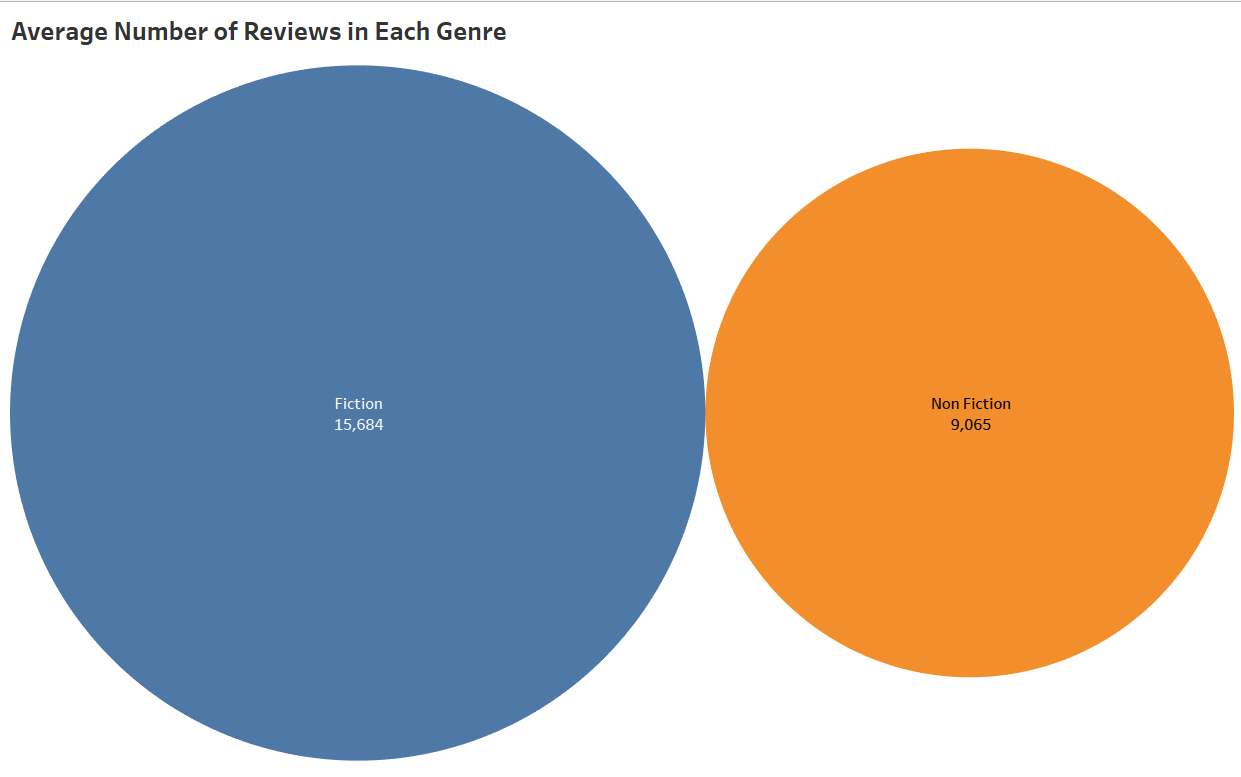

On average, fiction books accumulate more reviews than their non-fiction counterparts, with a relatively large gap between the two genres, the review culture of the fiction community is dominant.

### Trends over the years

Here, we look at the trend of reviews, ratings, price of books in the Top 50 Amazon bestselling list over the decade.

Text(0.5, 1.0, 'Trend of Book Reviews on Amazon over the years')

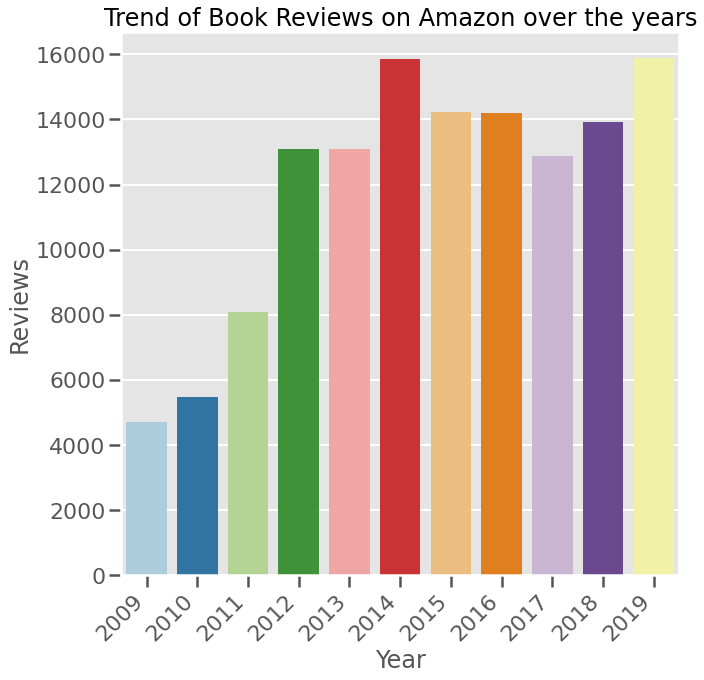

In [32]:
# Review culture over the years
years_order = categorized_df.groupby(['Year'], as_index=False)['Reviews'].mean()
plt.figure(figsize=(10,10))
chart=sns.barplot(data=years_order, x='Year',y='Reviews')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Trend of Book Reviews on Amazon over the years')

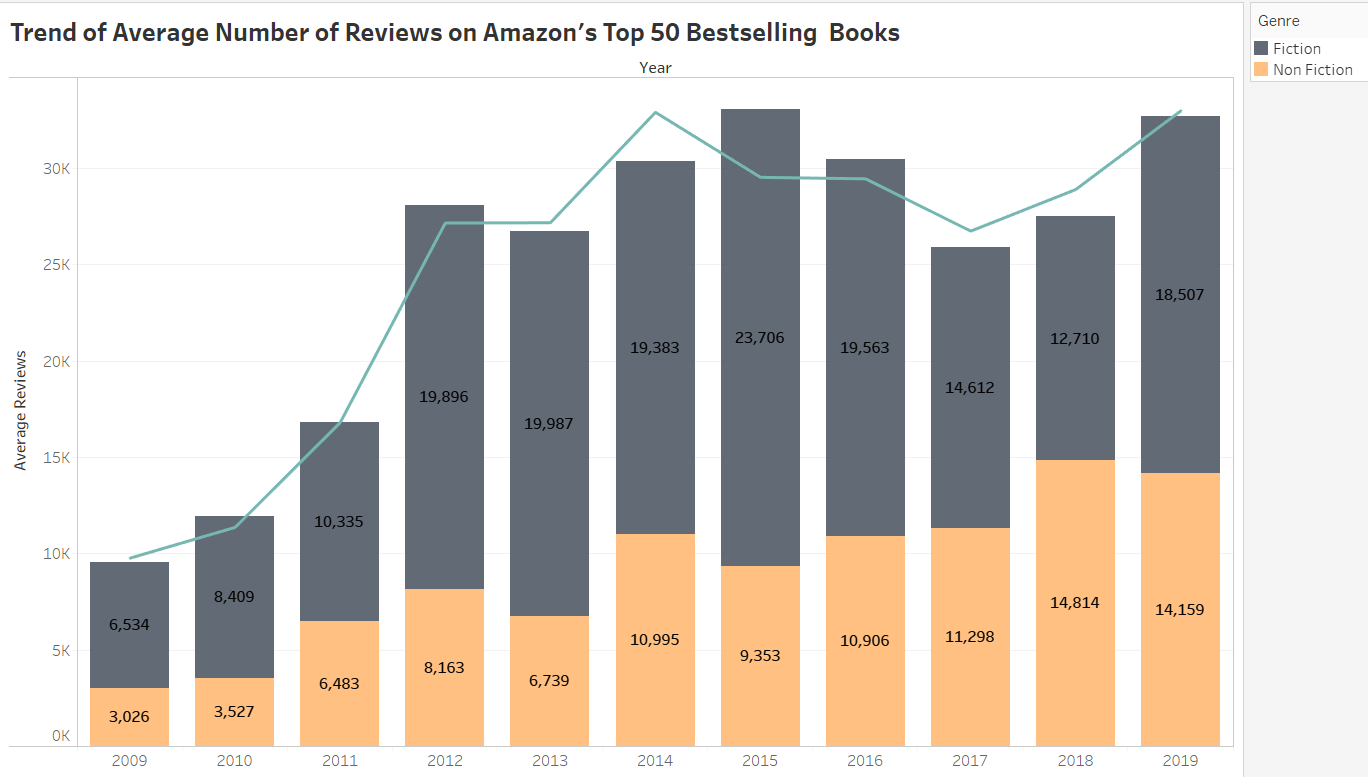

The number of book reviews on Amazon bestsellers trended upwards on average with notable dips in 2013 and 2017. Fiction publications were dominant in reviews for every year except 2018.

Text(0.5, 1.0, 'Trend of Bestselling Book Price on Amazon over the years')

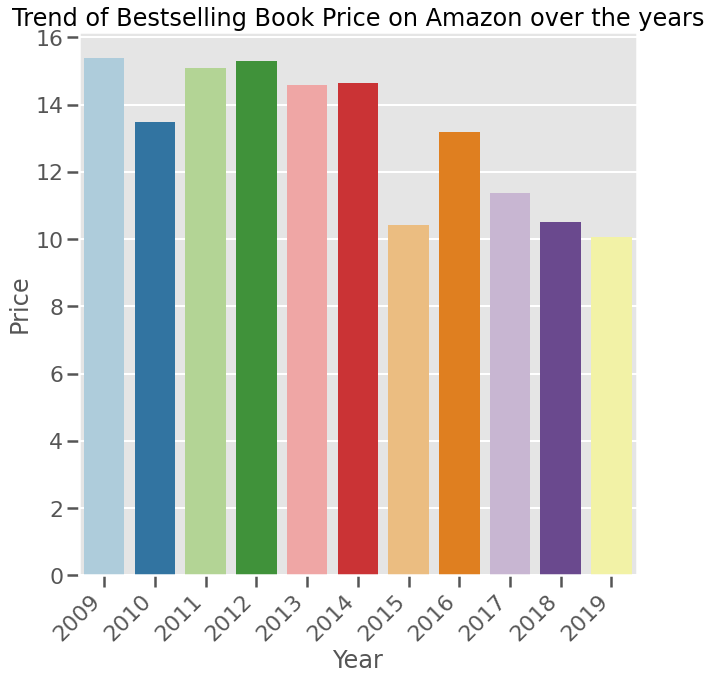

In [33]:
# Trend in average price over the years
years_order = categorized_df.groupby(['Year'], as_index=False)['Price'].mean()
plt.figure(figsize=(10,10))
chart=sns.barplot(data=years_order, x='Year',y='Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Trend of Bestselling Book Price on Amazon over the years')

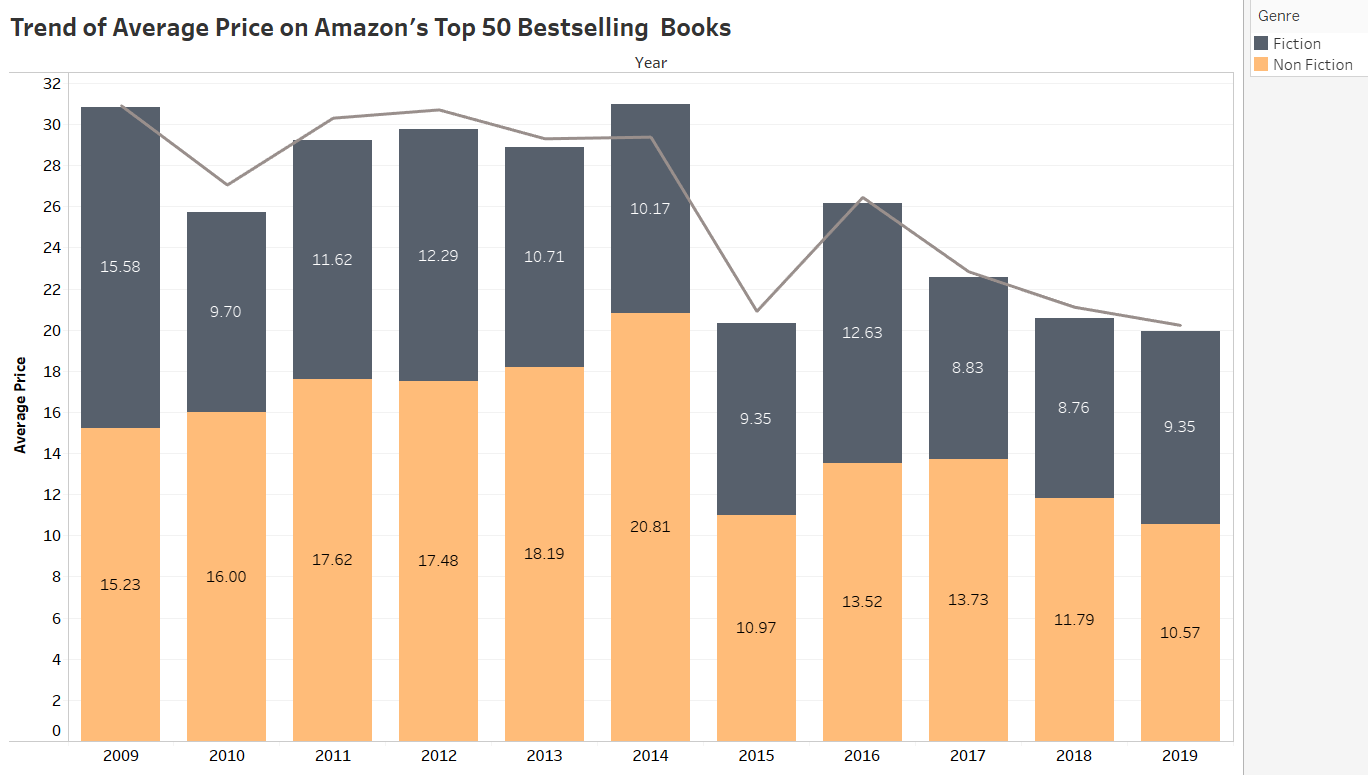

The average price of books on the Amazon bestselling list has been trending downwards over the years with a sharp change from 2014 to 2015. Non-fiction books were price higher on average from 2010 downwards, with 2009 being the sole year where ficion books are more expensive on average.

Text(0.5, 1.0, 'Trend of Ratings on Amazon over the years')

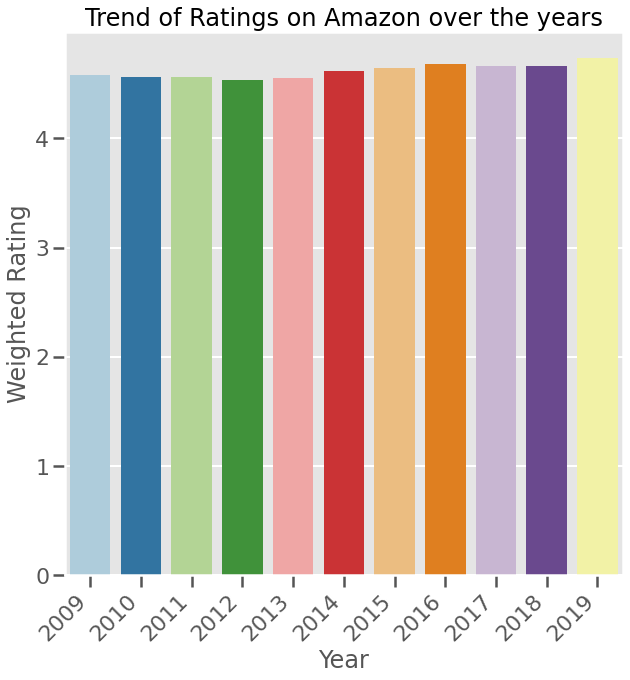

In [34]:
# Trend in Average Ratings on the Bestselling list
years_order = categorized_df.groupby(['Year'], as_index=False)['Weighted Rating'].mean()
plt.figure(figsize=(10,10))
chart=sns.barplot(data=years_order, x='Year',y='Weighted Rating')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Trend of Ratings on Amazon over the years')

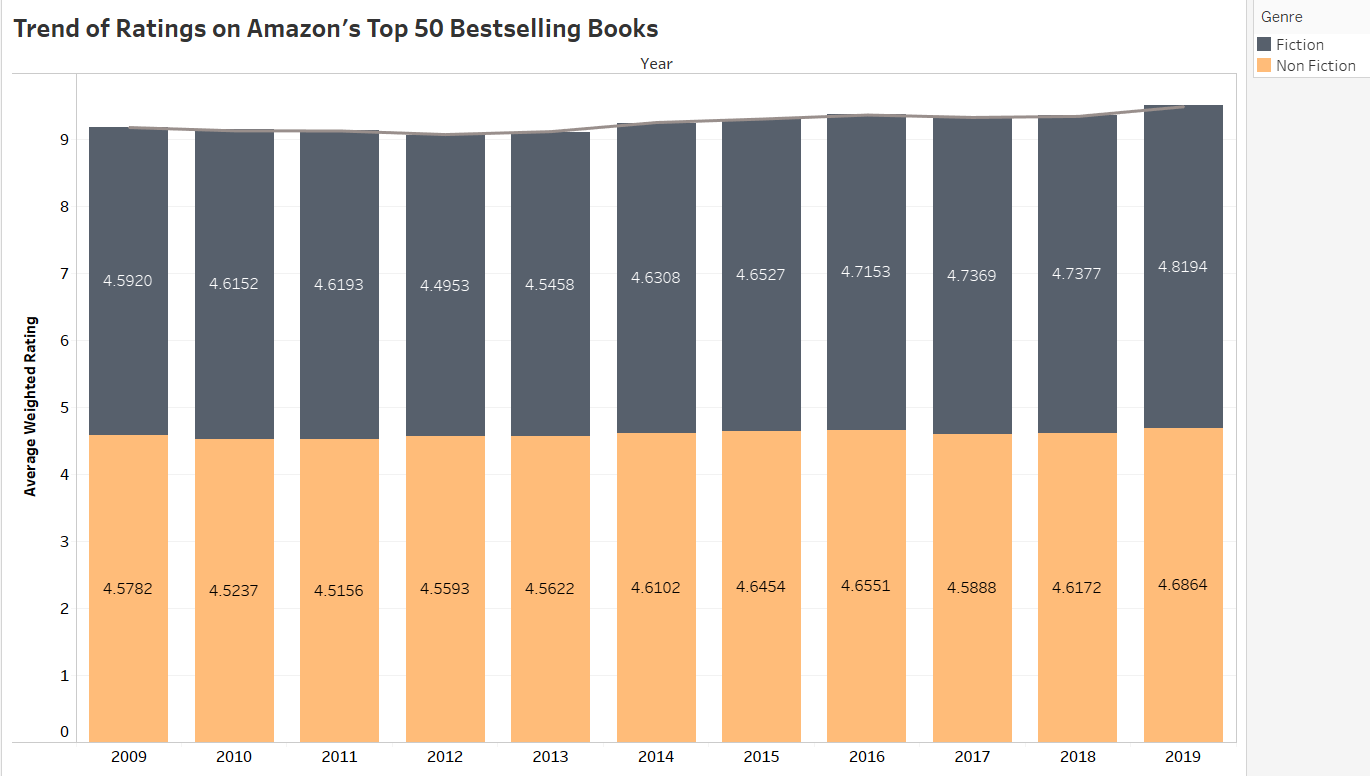

The ratings of Amazon's Top 50 bestselling books have remained relatively stable over the years, with a slight rise from 2014 - 2019. Non-fiction books were only rated higher on average in 2012 and 2013.

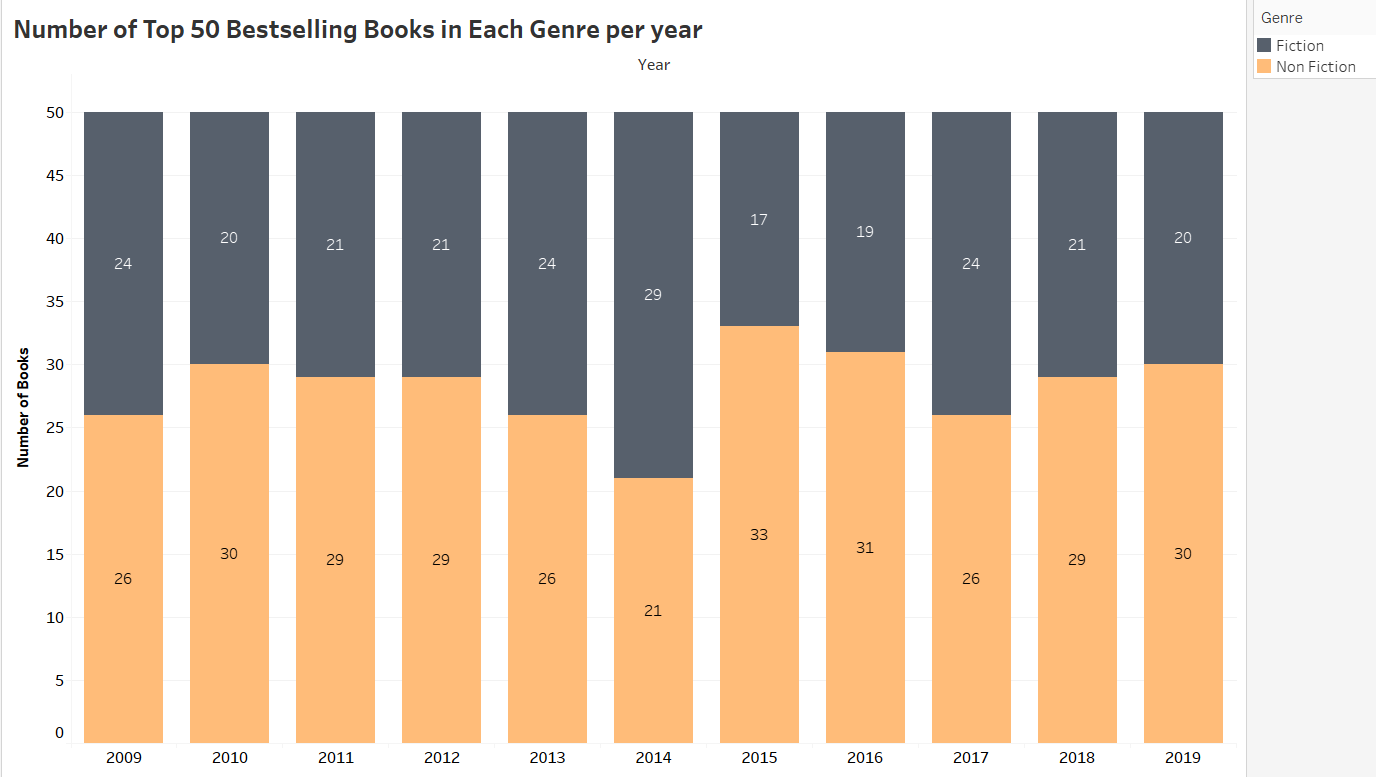

## Conclusion

There were more non-fiction books on the bestselling list over the years and these non-fiction books were more expensive than their counterparts on average. However, fiction books are reviewed more and rated higher on average. 